In [1]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union


from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation




In [5]:
#Burgers
data = np.load('data_Burgers_noise0.005.npy')  
grid_x = np.linspace(-1, 1, 32)  
grid_t = np.linspace(0, 0.5, 32)
x = np.linspace(-1, 1, 32)
t = np.linspace(0, 0.5, 32)
dx = (1 - (-1)) / 32
dt = (0.5 - 0) / 32

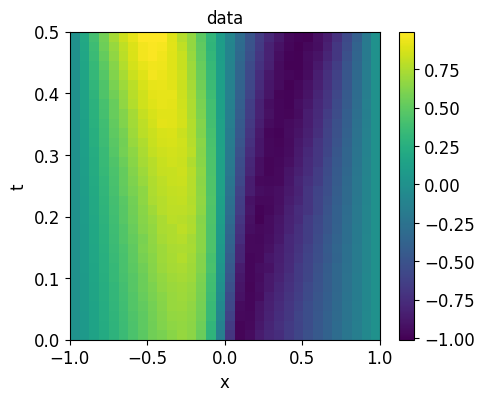

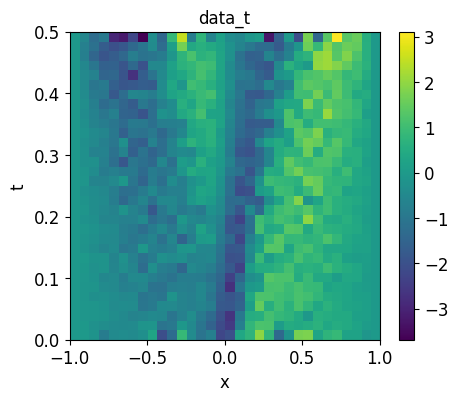

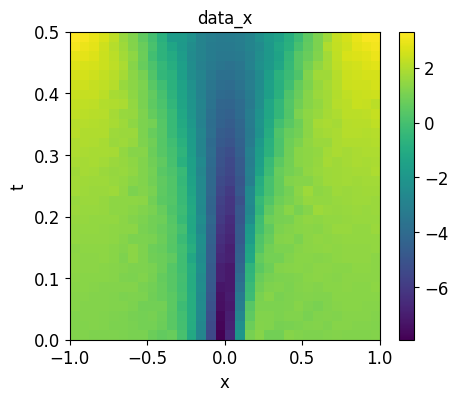

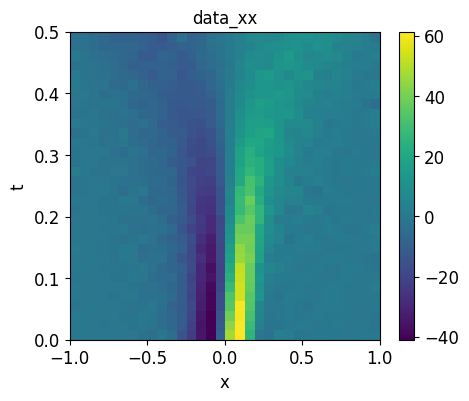

In [36]:
gradient_x = np.gradient(data, dx, axis=1, edge_order=2) 
gradient_t = np.gradient(data, dt, axis=0, edge_order=2)

gradient_xx = np.gradient(gradient_x, dx, axis = 1, edge_order=2)

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_t, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [37]:
np.save('Burgers_Gradient_x_noise0.01.npy', gradient_x)
np.save('Burgers_Gradient_xx_noise0.01.npy', gradient_xx)
np.save('Burgers_Gradient_t_noise0.01.npy', gradient_t)

(32, 32)
(32,)
(32,)


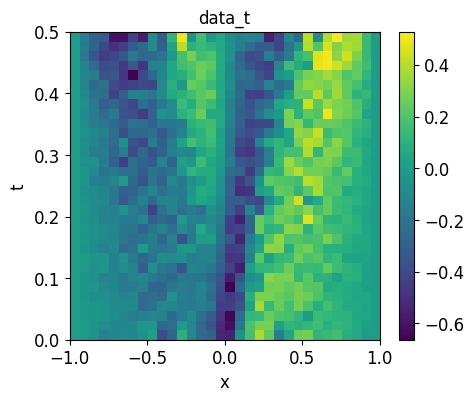

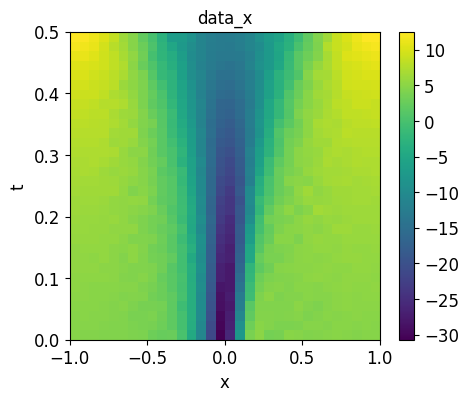

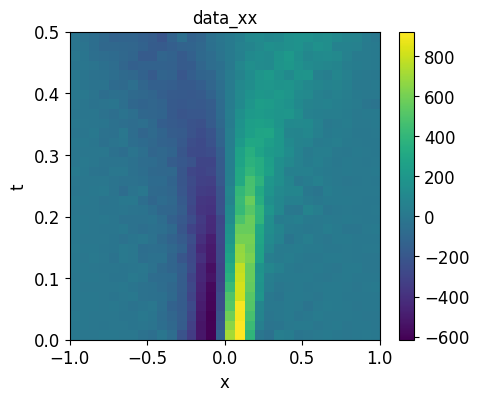

In [38]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2, 2]
mixed = False  

derivatives = derivative_calculator(data, [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [39]:
np.save('Burgers_Adaptive_t_noise0.01.npy', derivatives[:, :, 0])
np.save('Burgers_Adaptive_x_noise0.01.npy', derivatives[:, :, 2])
np.save('Burgers_Adaptive_xx_noise0.01.npy', derivatives[:, :, 3])

In [40]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)

(32, 32)
(32,)
(32,)


1024


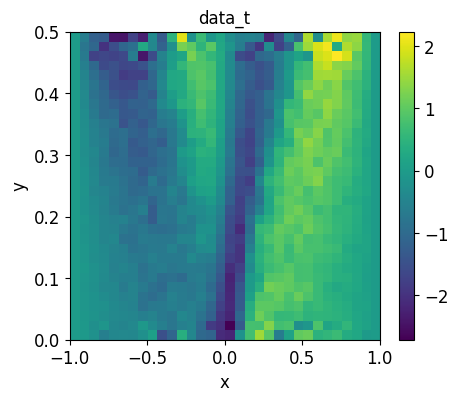

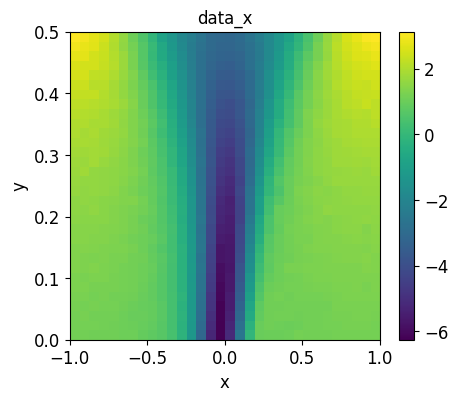

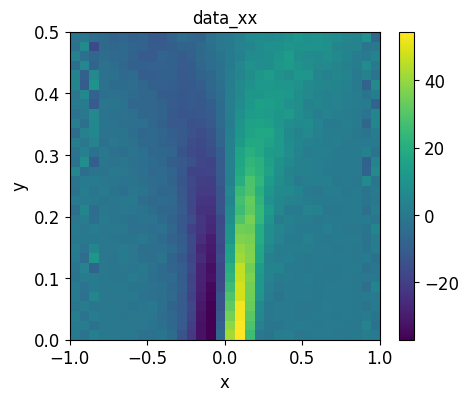

In [41]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = np.meshgrid(grid_t, grid_x, indexing='ij')
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)


plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [42]:
np.save('Burgers_Polynomial_t_noise0.01.npy', derivatives[:, :, 0])
np.save('Burgers_Polynomial_x_noise0.01.npy', derivatives[:, :, 2])
np.save('Burgers_Polynomial_xx_noise0.01.npy', derivatives[:, :, 3])

(32, 32)
2


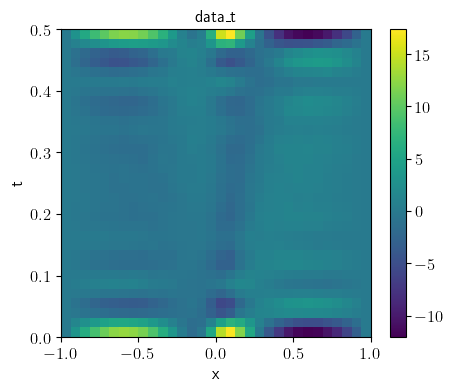

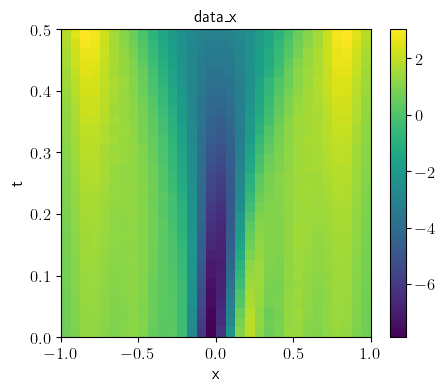

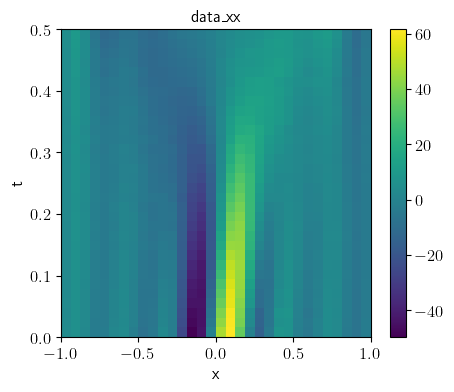

In [6]:
grid = [grid_t, grid_x]
print(data.shape)
print(len(grid))

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_nd(data, grid, n=15, steepness=10)
derivatives1 = derivative_calculator.spectral_derivative_nd(derivatives[1][1], grid, n=15, steepness=10)


plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [7]:
np.save('Burgers_Spectral_t_noise0.005.npy', derivatives[0][1])
np.save('Burgers_Spectral_x_noise0.005.npy', derivatives[1][1])
np.save('Burgers_Spectral_xx_noise0.005.npy', derivatives1[1][1])

(32, 32)
2
(32, 32)


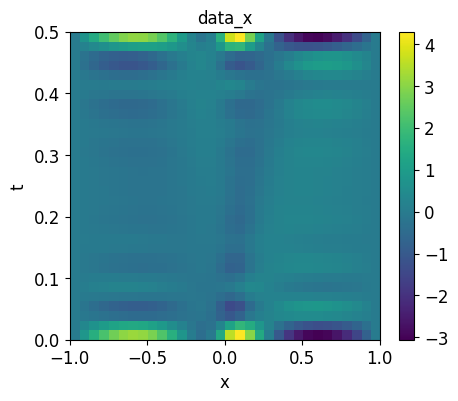

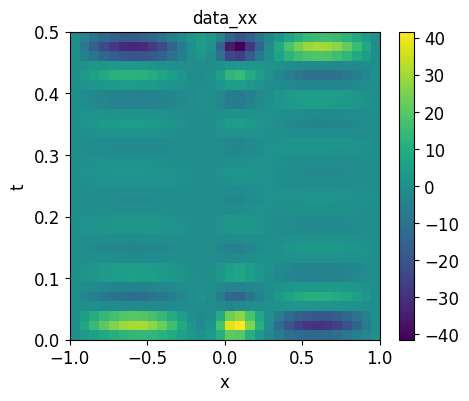

In [49]:
grid = [grid_x, grid_t]
print(data.shape)
print(len(grid))

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_high_ord(data, grid, max_order=2, n=[15, 15], steepness=10)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()




For some reason has to be abysmal: (-39.74486757153775, 67.48416796739272)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
For some reason has to be abysmal: (-39.27616090173796, 20.481154408412312)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
5

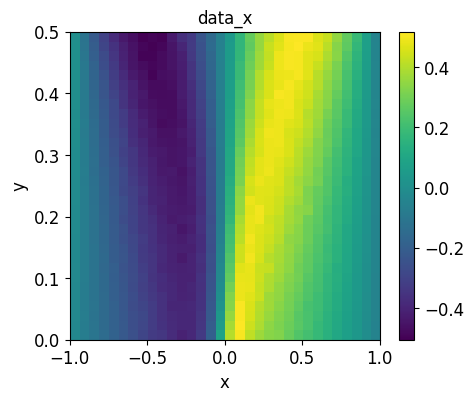

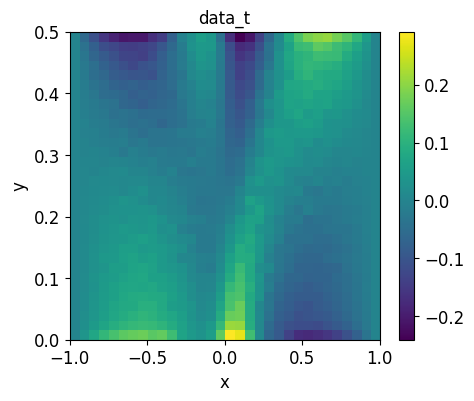

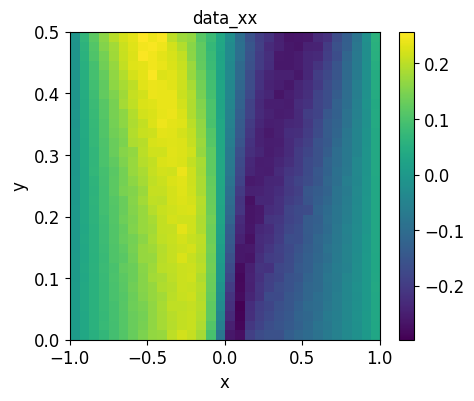

In [61]:
lbd = 1000
reg_strng = 100
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[1, :, :], lbd, reg_strng, c_const)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [63]:
np.save('Burgers_Total_t_noise0.01.npy', derivatives1[1, :, :])
np.save('Burgers_Total_x_noise0.01.npy', derivatives1[0, :, :])
np.save('Burgers_Total_xx_noise0.01.npy', derivatives2[0, :, :])

Mean Squared Error (MSE) for noise level 0:
  u_xx: 30374.734921531497
  u_x: 43.91031628932872
  u_t: 0.45304466531103066
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 30505.617023014456
  u_x: 43.95109309371691
  u_t: 0.4779643119737941
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 30565.170855156364
  u_x: 43.95109585962189
  u_t: 0.5382989547526317


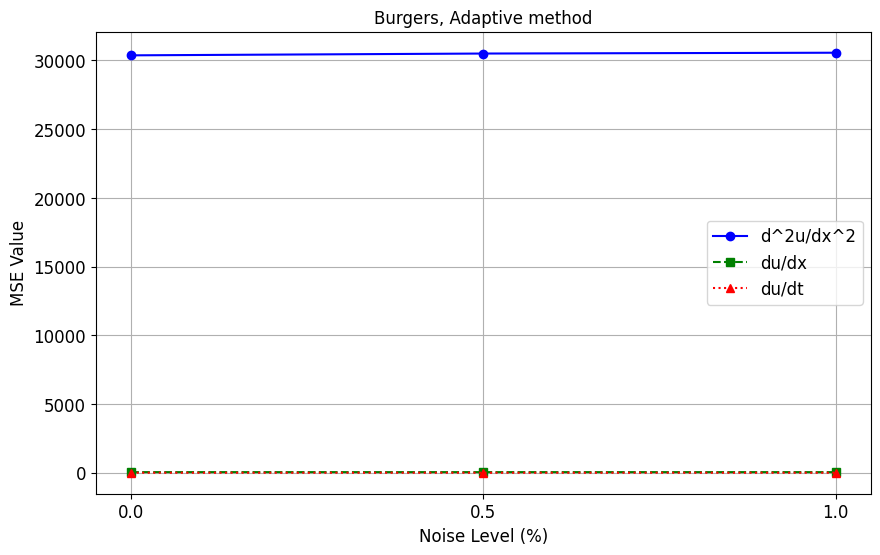

In [6]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xx = np.load(f'Burgers_Gradient_xx_noise{noise}.npy')
    u_x = np.load(f'Burgers_Gradient_x_noise{noise}.npy')
    u_t = np.load(f'Burgers_Gradient_t_noise{noise}.npy')
    
    gradient_xx = np.load(f'Burgers_Adaptive_xx_noise{noise}.npy')
    gradient_x = np.load(f'Burgers_Adaptive_x_noise{noise}.npy')
    gradient_t = np.load(f'Burgers_Adaptive_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('Burgers, Adaptive method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Burgers_Adaptive_error.pdf', format='pdf')
plt.show()


In [9]:
rounded = round(1.1319596635157685, 4)
print(rounded) 

1.132


In [41]:
gradient_diff_error_noise0 = [0.000329, 0.0039, 0.00004184, 0.00067, 0.0113]
gradient_diff_error_noise05 = [0.00478, 0.0120, 0.0000947, 0.00081, 0.0124]
gradient_diff_error_noise1 = [0.0260, 0.0403, 0.0002695, 0.00122, 0.0160]

adaptive_diff_error_noise0 = [0.4530, 30374.7349, 43.9103, 0.2540, 65999.0757, 4.0918, 0.0124, 0.0814, 0.00801, 0.1507, 2.0602, 1.2876]
adaptive_diff_error_noise05 = [0.4780, 30505.6170, 43.9511, 0.2544, 67786.0505, 4.0969, 3.7555, 5.4563, 0.008, 0.1498, 56.2421, 947.3597]
adaptive_diff_error_noise1 = [0.5383, 30565.1709, 43.9511, 0.2543, 74009.266, 4.1105, 15.2715, 10.3725, 0.0096, 0.1609, 213.6322, 4567.2138]

polynomial_diff_error_noise0 = [0.022, 0.0292, 9.8417, 0.0057, 0.0058, 0.0036, 0.00007761, 0.0254, 0.0004532, 0.0012, 1.1339, 0.0724 ]
polynomial_diff_error_noise05 = [0.0218, 0.0349, 3047.6637, 13167.1760, 38.4966, 41.9891, 0.0021, 0.05,0.0004592, 0.0234,1.7973, 0.0737]
polynomial_diff_error_noise1 = [0.0241, 0.0416, 10740.0809, 57619.2452, 126.9283, 123.2955,0.0106, 0.1061,0.000499, 0.088, 3.5219, 0.0761]

spectral_diff_error_noise0 = [7.0597, 14.0607, 0.0757, 0.7798, 14.2334, 0.0129, 152.6378,87.813, 0.0759, 0.2517, 87251.4516,32328.7991 ]
spectral_diff_error_noise05 = [7.0293, 14.1771, 0.0761, 0.7804, 14.2418, 0.0128,165.1737, 108.4259, 0.0764, 0.2534, 87963.7107, 36937.9071]
spectral_diff_error_noise1 = [7.1244, 14.7814, 0.0783, 0.7811, 14.2637, 0.0129,203.1654,128.0034, 0.0771, 0.2538, 92107.8232, 44231.8631]

inverse_diff_error_noise0 = [0.7638, 153.0405,4.6508, 0.3105, 0.3202, 0.0473, 0.0098, 0.178, 1.1231,3.9290,12282.1612,47.9087]
inverse_diff_error_noise05 = [0.8013,153.7448, 4.6542, 0.0473,0.3114, 0.3211, 3138.8938,426.1978,1.1220,6.2318,13359.6413,3287.3561]
inverse_diff_error_noise1 = [0.8933, 154.1399, 4.6562, 0.0473, 0.3108,0.3568, 4647.4401,94205.9511,1.132,9.6419,17561.9236, 15300.6987]

total_diff_error_noise0 = [0.6760, 154.9538, 5.3229,0.357,0.3275,0.0937,1.0941,0.9853,0.6988,1.8895,12444.1383,65.6059]
total_diff_error_noise05 = [0.7139,155.6498,5.3271,0.3571,0.3275,0.0937,12.4789,15.7744,0.6998,1.8857,13524.8049,3315.1318]
total_diff_error_noise1 = [0.8085,156.0558,5.3286,0.3573,0.3273,0.0936, 49.8341,35.4761,0.6993,1.9013,17738.1271,15580.1558]

In [59]:
gradient_coeff_error_noise0 = [0.0546,0.0154 ,0.1055 ,0.5435 ,1.0008 ,4.6556 ,0,0.003,3.0219,0.0344,0,0,0.0675]
gradient_coeff_error_noise05 = [0.1273,0.0072,0.148,0.8326,0.9999,4.4308,0.7928,0.4871,3.0205,0.0278,0,0.9963,0.063]
gradient_coeff_error_noise1 = [0.5912,0.0449,0.4738,0.6289,0.9181,5.2801,0.5524,0.5038,3.0098,0.0252,0,1.0041,0.0561]

adaptive_coeff_error_noise0 = [0.0546 ,0.0154 ,0.1055 ,0.5435 ,1.0008 ,4.6556 ,0,0.003,3.0197,0.0414,0,0,0.1204,]
adaptive_coeff_error_noise05 = [0.6173,0.0419,0.9722,0.8326,0.9999,4.4308,0.5245,0.485,3.0152,0.0327,0,0.9992,0.0347]
adaptive_coeff_error_noise1 = [0.7293,0.036,0.9087,0.6289,0.9181,5.2801,0.5953,0.4944,3.0444,0.0351,0,0.0517]

polynomial_coeff_error_noise0 = [0.0717 ,0.0061,0.1069,0.4955 ,5.9697,0 ,0.0036,3.0541,0.0152,0,0.1452]
polynomial_coeff_error_noise05 = [0.0572,0.0122,0.049,0.0178,0.9978,5.1126,0.4861,0.6652,3.0363,0.0088,0.9982,0.0914]
polynomial_coeff_error_noise1 = [0.1755,0.0116,0.0605,0.3102,0.8889,5.0234,0.49,0.7881,3.0983,0.0045,0,1.0001,0.0416]

spectral_coeff_error_noise0 = [0.5975 ,0.0468,0.6268,1.0202,1.0002,5.7703 ,0,0,2.9688 ,0.0508,0.1003]
spectral_coeff_error_noise05 = [0.6036,0.0362,0.6774,1.0191,1.0000,5.8294,0.5272,0.4607,2.9712,0.0194,0.0952,0.8451]
spectral_coeff_error_noise1 = [0.6586,0.0451,0.609,1.0320,0.9999,5.8964,0.6612,0.4667,2.9349,0.0754,0.0828,0.8467]

inverse_coeff_error_noise0 = [0.7882,0.0739,1.0773,1.0142,5.7588 ,0.0015 ,0.0045 ,2.9858 ,0.2713,0.4931 ,0.0514 ,0.0587]
inverse_coeff_error_noise05 = [0.6936,0.0362,0.6774,0.5302,1.0001,6.0419,1.0000,0.4421,2.9745,0.034,0.8652,1.8171,0.5355]
inverse_coeff_error_noise1 = [0.8431,0.0262,0.9467,0.876,1.1313,6.0565,0.4132,0.6339,3.0639,0.0611,1.0789,1.3441,0.5814]

total_coeff_error_noise0 = [0.5627 ,1.2682,0.8676 ,0.1666 ,2.1503,6.9770 ,0,0,2.6099 ,0.7452,0.0647 ,0.0049 ,1.0529]
total_coeff_error_noise05 = [0.4628,0.746,0.953,0.1836,2.1569,6.9282,0.6589,0.8126,2.6063,0.75,0.0613,2,0.938]
total_coeff_error_noise1 = [1.5011,0.4095,0.9731,0.1606,6.6780,0.6705,0.785,3.6051,1.7502,0.0629,1.3441,0.94460]

gradient_coeffci_error_noise0 = [0.0301,0.0133,0.0327,0.2045,0.0038,0.1839,0.0082,0.0048,0.0338,0]
gradient_coeffci_error_noise05 = [0.0398,0.0035,0.0479,0.2523,0.1447,0.1540,0.0095,0.0043,0.0075,0.0199]
gradient_coeffci_error_noise1 = [0.0448,0.0269,0.0840,0.0647,0.3075,0.1022,0.0192,2.0251,0.0053,0.0068,0.0070]

adaptive_coeffci_error_noise0 = [0.0301,0.0133,0.0327,0.2045,0.0038,0.1839,0.0077,0.0053,0,0.0408]
adaptive_coeffci_error_noise05 = [0.0621,0.0085,0.0198,0.2523,0.1447,0,0.1158,0.0065,0.0112,0.0055,0,0.0061,0.0131]
adaptive_coeffci_error_noise1 = [0.0511,0.0313,0.0478,0.1267,0.0647,0.0751,0.0796,0.0164,0.0523,0.0040,0,0.0056]

polynomial_coeffci_error_noise0 = [0.0332, 0.0188,0.0556,0.4228,0.0011,0,0,0.0452,0.0002,0,0,0.0430]
polynomial_coeffci_error_noise05 = [0.0150,0.0202,0.0382,0.0248,0.2106,0.0077,0.0365,0.0331,0.0058,0.0030,0.0345]
polynomial_coeffci_error_noise1 = [0.0360,0.0208,0.0375,0.1512,1.4098,0.1917,0.0140,0.0521,0.0748,0.0082,0,0.0005,0.0191]

spectral_coeffci_error_noise0 = [0.0549,0.0171,0.0849,0.0401,0.000,0.1165,0,0,0.0282,0.0631,0.1026]
spectral_coeffci_error_noise05 = [0.0521,0.0033,0.0810,0.0614,0.0003,0.1092,0.0783,0.0137,0.0177,0.0533,0.0804,0.0041]
spectral_coeffci_error_noise1 = [0.0472,0.0207,0.0798,0.0667,0.0006,0.0779,0.1160,0.0117,0.0191,0.0410,0.0746,0.0039]

inverse_coeffci_error_noise0 = [0.1229,0.1173,0.1174,0.0007,0.0004,0.0007,0.0013,0.0282,0.0631,0.1026,0.0502,0.0162]
inverse_coeffci_error_noise05 = [0.0521,0.0033,0.0810,0.1770,0.0003,0.0954,0.0025,0.0239,0.0177,0.0533,0.0804,0.1025,0.1638]
inverse_coeffci_error_noise1 = [0.0575,0.0420,0.0453,0.0939,0.1499,0.0776,0.0061,0.0714,0.0191,0.0410,0.0746,0.1927,0.1901]

total_coeffci_error_noise0 = [0.2731,0.2525,0.1249,0.4282,0,0.0231,0,0,0.0032,0.0068,0.0003,0.0097,0.0191]
total_coeffci_error_noise05 = [0.3144,0.3206,0.0646,0.1561,0.1997,0.0466,0.1787,0.0382,0.0027,0,0,0,0]
total_coeffci_error_noise1 = [0.1903,0.2082,0.0465,0.1006,0.1103,0.0528,0.0566,0.0027,0.0003,0.0003,0.1927,0.092]

In [68]:
gradient_shd_noise0 = [4,3,1,0,1]
gradient_shd_noise05 = [5,5,2,0,4]
gradient_shd_noise1 = [6,6,2,0,5]

adaptive_shd_noise0 = [4,3,0,0,1]
adaptive_shd_noise05 = [7,5,2,0,4]
adaptive_shd_noise1 = [4,6,2,0,5]

polynomial_shd_noise0 = [4,3,0,0,1]
polynomial_shd_noise05 = [4,5,2,0,4]
polynomial_shd_noise1 = [4,6,2,0,4]

spectral_shd_noise0 = [6,6,3,3,4]
spectral_shd_noise05 = [6,7,3,3,4]
spectral_shd_noise1 = [6,7,3,3,3]

inverse_shd_noise0 = [6,4,2,4,3]
inverse_shd_noise05 = [6,5,3,4,3]
inverse_shd_noise1 = [6,7,2,4,4]

total_shd_noise0 = [6,4,2,0,2]
total_shd_noise05 = [6,5,2,0,2]
total_shd_noise1 = [6,5,2,0,2]

gradient_shdci_noise0 = [0.091,0.1302,0,0.0491,0.1206]
gradient_shdci_noise05 = [0.1412,0.2209,0.0629,0.0535,0.0979]
gradient_shdci_noise1 = [0.2134,0.2824,0.0843,0.0424,0.1186]

adaptive_shdci_noise0 = [0.091,0.1655,0.0159,0.0636,0.1189]
adaptive_shdci_noise05 = [0.2144,0.2836,0.0637,0.0458,0.0671]
adaptive_shdci_noise1 = [0.127,0.3199,0.0815,0.0433,0.0833]

polynomial_shdci_noise0 = [0.272,0.1824,0.0112,0.0654,0.119]
polynomial_shdci_noise05 = [0.1334,0.1935,0.1062,0.0734,0.1237]
polynomial_shdci_noise1 = [0.1248,0.247,0.102,0.0627,0.1252]

spectral_shdci_noise0 = [0.1993,0.1698,0.0999,0.1855,0]
spectral_shdci_noise05 = [0.2107,0.2087,0.0992,0.1971,0.0631]
spectral_shdci_noise1 = [0.2096,0.1827,0.0974,0.1904,0.0687]

inverse_shdci_noise0 = [0.3554,0.1267,0.1432,0.2077,0.1314]
inverse_shdci_noise05 = [0.2107,0.2632,0.1305,0.1531,0.1305]
inverse_shdci_noise1 = [0.2057,0.2509,0.0883,0.1231,0.1004]

total_shdci_noise0 = [0.1299,0.1332,0.1169,0.0749,0.0726]
total_shdci_noise05 = [0.1152,0.1394,0.1084,0.0783,0.0571]
total_shdci_noise1 = [0.1283,0.133,0.1064,0.0792,0.0847]




In [69]:
print('gradient diff', np.mean(gradient_diff_error_noise0), np.mean(gradient_diff_error_noise05), np.mean(gradient_diff_error_noise1))
print('adaptive diff', np.mean(adaptive_diff_error_noise0), np.mean(adaptive_diff_error_noise05), np.mean(adaptive_diff_error_noise1))
print('polynomial diff', np.mean(polynomial_diff_error_noise0), np.mean(polynomial_diff_error_noise05), np.mean(polynomial_diff_error_noise1))
print('spectral diff', np.mean(spectral_diff_error_noise0), np.mean(spectral_diff_error_noise05), np.mean(spectral_diff_error_noise1))
print('inverse diff', np.mean(inverse_diff_error_noise0), np.mean(inverse_diff_error_noise05), np.mean(inverse_diff_error_noise1))
print('total diff', np.mean(total_diff_error_noise0), np.mean(total_diff_error_noise05), np.mean(total_diff_error_noise1))

gradient diff 0.003248168 0.00601694 0.0167579
adaptive diff 8035.510000833335 8279.451608333335 9119.162633333333
polynomial diff 0.9284525675 1358.1107549333335 5717.78489991667
spectral diff 9988.104275 10434.322058333333 11392.352316666666
inverse diff 1041.203575 1698.2769083333333 10990.599308333332
total diff 1056.3452333333335 1419.4370499999998 2797.4303999999997


In [70]:
print('gradient coeff', np.mean(gradient_coeff_error_noise0), np.mean(gradient_coeff_error_noise05), np.mean(gradient_coeff_error_noise1))
print('adaptive coeff', np.mean(adaptive_coeff_error_noise0), np.mean(adaptive_coeff_error_noise05), np.mean(adaptive_coeff_error_noise1))
print('polynomial coeff', np.mean(polynomial_coeff_error_noise0), np.mean(polynomial_coeff_error_noise05), np.mean(polynomial_coeff_error_noise1))
print('spectral coeff', np.mean(spectral_coeff_error_noise0), np.mean(spectral_coeff_error_noise05), np.mean(spectral_coeff_error_noise1))
print('inverse coeff', np.mean(inverse_coeff_error_noise0), np.mean(inverse_coeff_error_noise05), np.mean(inverse_coeff_error_noise1))
print('total coeff', np.mean(total_coeff_error_noise0), np.mean(total_coeff_error_noise05), np.mean(total_coeff_error_noise1))

print('gradient coeff ci', np.mean(gradient_coeffci_error_noise0), np.mean(gradient_coeffci_error_noise05), np.mean(gradient_coeffci_error_noise1))
print('adaptive coeff ci', np.mean(adaptive_coeffci_error_noise0), np.mean(adaptive_coeffci_error_noise05), np.mean(adaptive_coeffci_error_noise1))
print('polynomial coeff ci', np.mean(polynomial_coeffci_error_noise0), np.mean(polynomial_coeffci_error_noise05), np.mean(polynomial_coeffci_error_noise1))
print('spectral coeff ci', np.mean(spectral_coeffci_error_noise0), np.mean(spectral_coeffci_error_noise05), np.mean(spectral_coeffci_error_noise1))
print('inverse coeff ci', np.mean(inverse_coeffci_error_noise0), np.mean(inverse_coeffci_error_noise05), np.mean(inverse_coeffci_error_noise1))
print('total coeff ci', np.mean(total_coeffci_error_noise0), np.mean(total_coeffci_error_noise05), np.mean(total_coeffci_error_noise1))

gradient coeff 0.7309384615384615 0.9179461538461537 1.0068
adaptive coeff 0.735376923076923 0.998923076923077 1.0601666666666667
polynomial coeff 0.8970909090909089 0.9610500000000001 0.9148230769230771
spectral coeff 1.107427272727273 1.1737083333333331 1.1923916666666667
inverse coeff 1.048225 1.2806 1.312023076923077
total coeff 1.2669230769230768 1.4813538461538462 1.5737250000000003
gradient coeff ci 0.051509999999999986 0.06833999999999998 0.24486363636363642
adaptive coeff ci 0.05221 0.04966153846153846 0.04621666666666668
polynomial coeff ci 0.051658333333333334 0.03903636363636364 0.15505384615384615
spectral coeff ci 0.046127272727272725 0.04623333333333333 0.046599999999999996
inverse coeff ci 0.05175 0.06563076923076923 0.08163076923076923
total coeff ci 0.08776153846153845 0.10166153846153846 0.08777499999999999


In [71]:
print('gradient shd', np.mean(gradient_shd_noise0), np.mean(gradient_shd_noise05), np.mean(gradient_shd_noise1))
print('adaptive shd', np.mean(adaptive_shd_noise0), np.mean(adaptive_shd_noise05), np.mean(adaptive_shd_noise1))
print('polynomial shd', np.mean(polynomial_shd_noise0), np.mean(polynomial_shd_noise05), np.mean(polynomial_shd_noise1))
print('spectral shd', np.mean(spectral_shd_noise0), np.mean(spectral_shd_noise05), np.mean(spectral_shd_noise1))
print('inverse shd', np.mean(inverse_shd_noise0), np.mean(inverse_shd_noise05), np.mean(inverse_shd_noise1))
print('total shd', np.mean(total_shd_noise0), np.mean(total_shd_noise05), np.mean(total_shd_noise1))

print('gradient shd ci', np.mean(gradient_shdci_noise0), np.mean(gradient_shdci_noise05), np.mean(gradient_shdci_noise1))
print('adaptive shd ci', np.mean(adaptive_shdci_noise0), np.mean(adaptive_shdci_noise05), np.mean(adaptive_shdci_noise1))
print('polynomial shd ci', np.mean(polynomial_shdci_noise0), np.mean(polynomial_shdci_noise05), np.mean(polynomial_shdci_noise1))
print('spectral shd ci', np.mean(spectral_shdci_noise0), np.mean(spectral_shdci_noise05), np.mean(spectral_shdci_noise1))
print('inverse shd ci', np.mean(inverse_shdci_noise0), np.mean(inverse_shdci_noise05), np.mean(inverse_shdci_noise1))
print('total shd ci', np.mean(total_shdci_noise0), np.mean(total_shdci_noise05), np.mean(total_shdci_noise1))

gradient shd 1.8 3.2 3.8
adaptive shd 1.6 3.6 3.4
polynomial shd 1.6 3.0 3.2
spectral shd 4.4 4.6 4.4
inverse shd 3.8 4.2 4.6
total shd 2.8 3.0 3.0
gradient shd ci 0.07818 0.11528000000000001 0.14822000000000002
adaptive shd ci 0.09098 0.13491999999999998 0.131
polynomial shd ci 0.13 0.12603999999999999 0.13233999999999999
spectral shd ci 0.1309 0.15576 0.14975999999999998
inverse shd ci 0.19288 0.17760000000000004 0.15368
total shd ci 0.1055 0.09967999999999999 0.10632


Mean Squared Error (MSE) for noise level 0:
  u_xx: 1.1338876015840507
  u_x: 0.07244422205714199
  u_t: 0.00121878097389429
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 1.7972757519931601
  u_x: 0.07368049921747846
  u_t: 0.023401218589183804
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 3.521869417434343
  u_x: 0.07612856213482039
  u_t: 0.08798457865124153


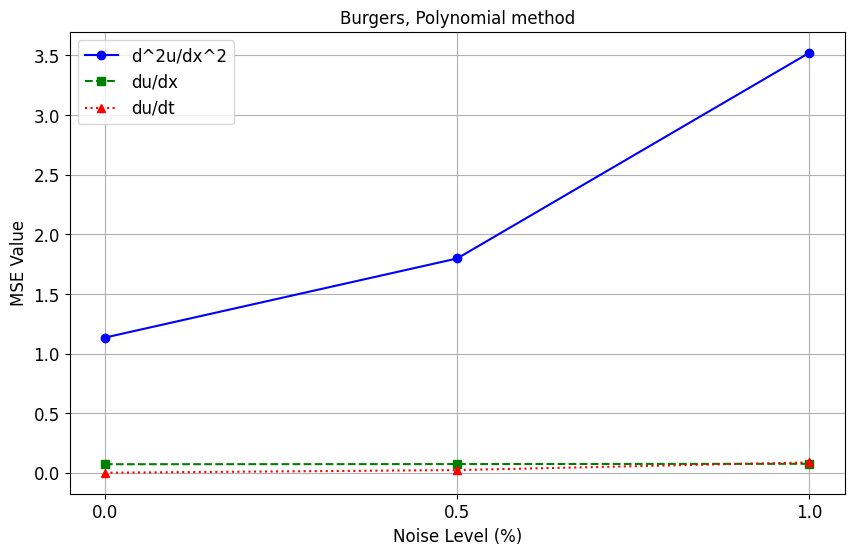

In [5]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xx = np.load(f'Burgers_Gradient_xx_noise{noise}.npy')
    u_x = np.load(f'Burgers_Gradient_x_noise{noise}.npy')
    u_t = np.load(f'Burgers_Gradient_t_noise{noise}.npy')
    
    gradient_xx = np.load(f'Burgers_Polynomial_xx_noise{noise}.npy')
    gradient_x = np.load(f'Burgers_Polynomial_x_noise{noise}.npy')
    gradient_t = np.load(f'Burgers_Polynomial_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('Burgers, Polynomial method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Burgers_Polynomial_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 14.060711450940339
  u_x: 0.07571076912144022
  u_t: 7.059708687006438
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 14.177083763676805
  u_x: 0.07614335299402979
  u_t: 7.029305189758594
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 14.781406686634066
  u_x: 0.07832323053590623
  u_t: 7.12442185154881


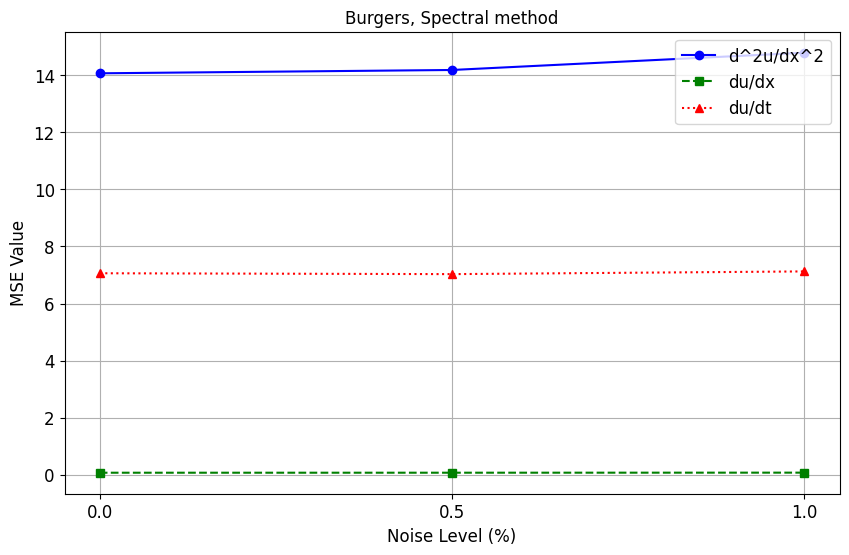

In [8]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xx = np.load(f'Burgers_Gradient_xx_noise{noise}.npy')
    u_x = np.load(f'Burgers_Gradient_x_noise{noise}.npy')
    u_t = np.load(f'Burgers_Gradient_t_noise{noise}.npy')
    
    gradient_xx = np.load(f'Burgers_Spectral_xx_noise{noise}.npy')
    gradient_x = np.load(f'Burgers_Spectral_x_noise{noise}.npy')
    gradient_t = np.load(f'Burgers_Spectral_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('Burgers, Spectral method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Burgers_Spectral_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 153.040488075121
  u_x: 4.650784902310504
  u_t: 0.7638189380805063
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 153.74476700316117
  u_x: 4.654237714357711
  u_t: 0.8013104232414345
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 154.139856890349
  u_x: 4.656224483204015
  u_t: 0.8933360685613384


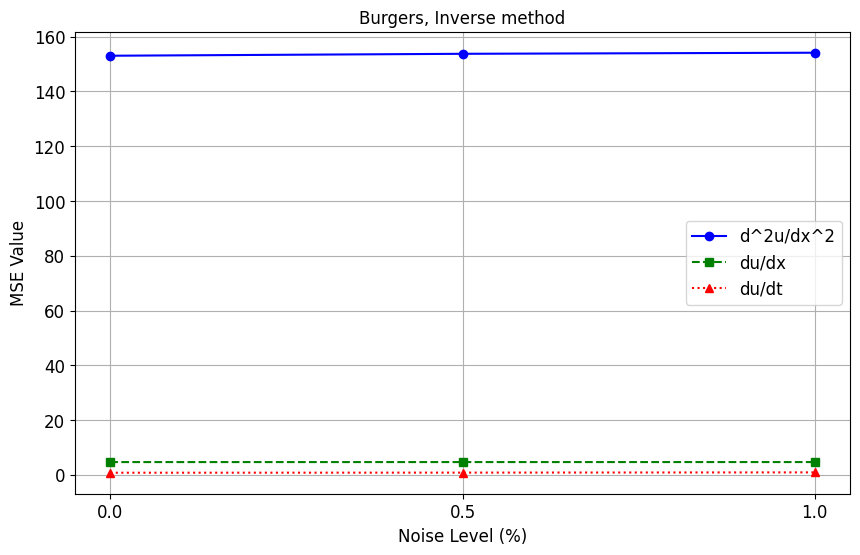

In [8]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xx = np.load(f'Burgers_Gradient_xx_noise{noise}.npy')
    u_x = np.load(f'Burgers_Gradient_x_noise{noise}.npy')
    u_t = np.load(f'Burgers_Gradient_t_noise{noise}.npy')
    
    gradient_xx = np.load(f'Burgers_Inverse_xx_noise{noise}.npy')
    gradient_x = np.load(f'Burgers_Inverse_x_noise{noise}.npy')
    gradient_t = np.load(f'Burgers_Inverse_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('Burgers, Inverse method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Burgers_Inverse_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 154.95380683023762
  u_x: 5.3228764877326595
  u_t: 0.6760056500654403
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 155.64982965082635
  u_x: 5.327092466124244
  u_t: 0.7139333683850413
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 156.05575447016608
  u_x: 5.32860904416924
  u_t: 0.8085050094754962


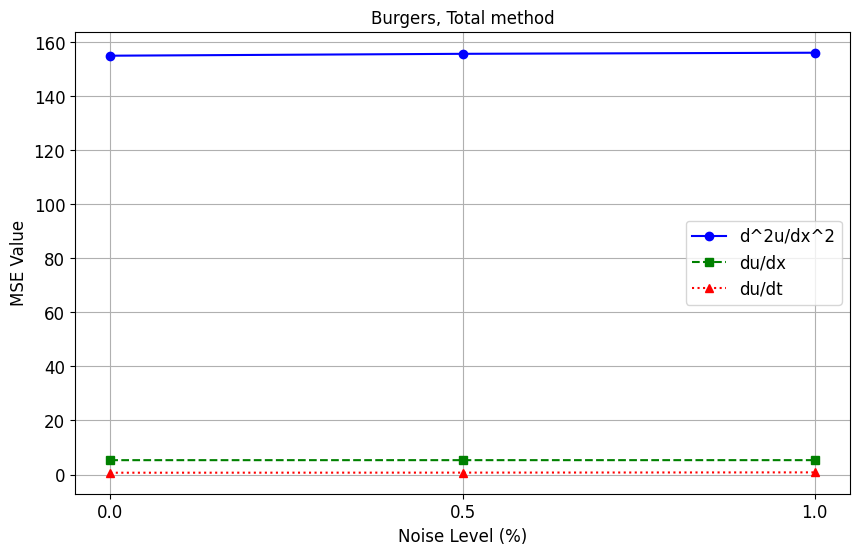

In [9]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_x = []
mse_values_u_t = []

for noise in noise_levels:
    u_xx = np.load(f'Burgers_Gradient_xx_noise{noise}.npy')
    u_x = np.load(f'Burgers_Gradient_x_noise{noise}.npy')
    u_t = np.load(f'Burgers_Gradient_t_noise{noise}.npy')
    
    gradient_xx = np.load(f'Burgers_Total_xx_noise{noise}.npy')
    gradient_x = np.load(f'Burgers_Total_x_noise{noise}.npy')
    gradient_t = np.load(f'Burgers_Total_t_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_x = calculate_mse(u_x, gradient_x)
    mse_u_t = calculate_mse(u_t, gradient_t)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_x.append(mse_u_x)
    mse_values_u_t.append(mse_u_t)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_x: {mse_u_x}')
    print(f'  u_t: {mse_u_t}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_x, marker='s', linestyle='--', color='g', label='du/dx')
plt.plot(noise_levels_percent, mse_values_u_t, marker='^', linestyle=':', color='r', label='du/dt')

plt.title('Burgers, Total method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Burgers_Total_error.pdf', format='pdf')
plt.show()
